In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
train_data.shape

(8000, 14)

In [7]:
print(train_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
train_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 937.5+ KB


In [10]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,1.569067e+07,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.205500
std,2887.649416,7.184743e+04,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.404092
min,2.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2512.750000,1.562822e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000
50%,5014.500000,1.569074e+07,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000
75%,7505.250000,1.575316e+07,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,0.000000
max,10000.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [11]:
train_data.drop('RowNumber',axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1561,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
1670,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6087,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
6669,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,Henderson,768,France,Male,54,8,69712.74,1,1,1,69381.05,0
5191,15681075,Chukwualuka,682,France,Female,58,1,0.00,1,1,1,706.50,0
5390,15573851,Macrossan,735,France,Female,38,1,0.00,3,0,0,92220.12,1
860,15807663,McGregor,667,France,Male,43,8,190227.46,1,1,0,97508.04,1


In [12]:
train_data.Geography.value_counts()

Geography
France     3994
Germany    2011
Spain      1995
Name: count, dtype: int64

In [13]:
train_data.Gender.value_counts()

Gender
Male      4362
Female    3638
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

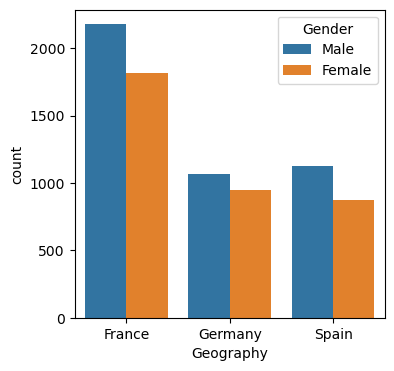

In [14]:
fig=plt.figure(figsize=(4,4))
sns.countplot(data=train_data,x='Geography',hue='Gender',order=train_data.Geography.value_counts(sort=True, ascending=False).index)

In [15]:
train_data.Surname.value_counts()[0:10]

Surname
Shih        24
Smith       24
Genovese    23
Martin      23
Yeh         22
Brown       22
Wright      21
Walker      20
Wang        20
Fanucci     20
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Age'>

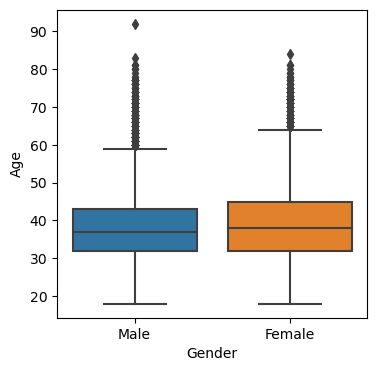

In [16]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Gender',y='Age')

In [17]:
train_data.HasCrCard.value_counts()

HasCrCard
1    5628
0    2372
Name: count, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='count'>

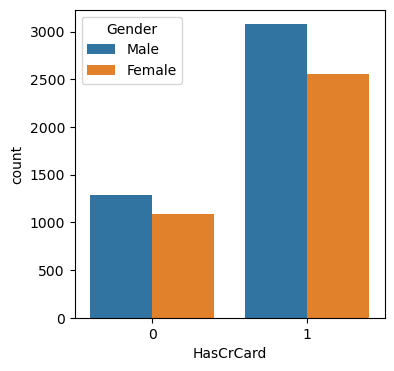

In [18]:
fig=plt.figure(figsize=(4,4))
sns.countplot(train_data,x='HasCrCard',hue='Gender')

In [19]:
train_data.IsActiveMember.value_counts()

IsActiveMember
1    4102
0    3898
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

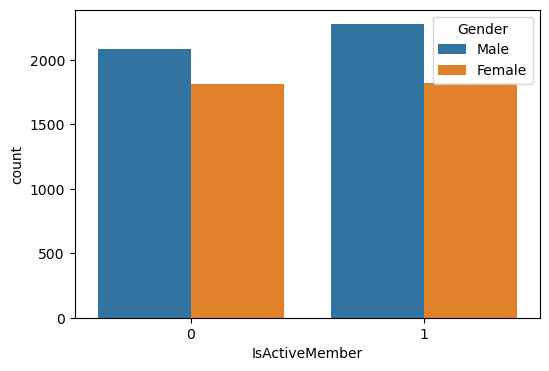

In [20]:
fig=plt.figure(figsize=(6,4))
sns.countplot(train_data,x='IsActiveMember',hue='Gender')

In [21]:
def age_interval(x):
    if x < 20:
        return "Less than 20" 
    elif x >=20 and x < 30:
        return "Between 20 and 30"
    elif x >=30 and x < 40:
        return "Between 30 and 40"
    elif x >=40 and x < 50:
        return "Between 40 and 50"
    elif x >=50 and x < 60:
        return "Between 50 and 60"
    else: 
        return "Larger than 60"
train_data['age_intervals'] = train_data.Age.map(lambda x : age_interval(x))

<Axes: xlabel='age_intervals', ylabel='count'>

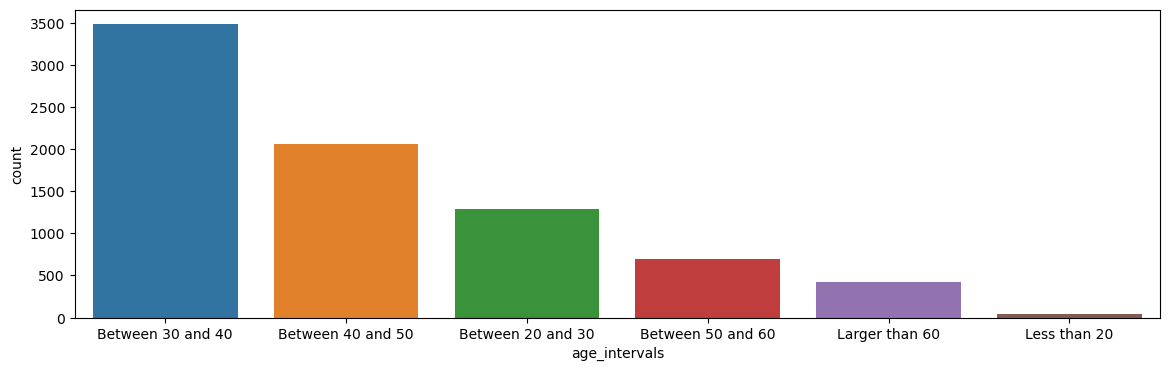

In [22]:
fig=plt.figure(figsize=(14,4))
sns.countplot(data=train_data,x='age_intervals',order=train_data.age_intervals.value_counts(sort=True, ascending=False).index)

<Axes: xlabel='age_intervals', ylabel='count'>

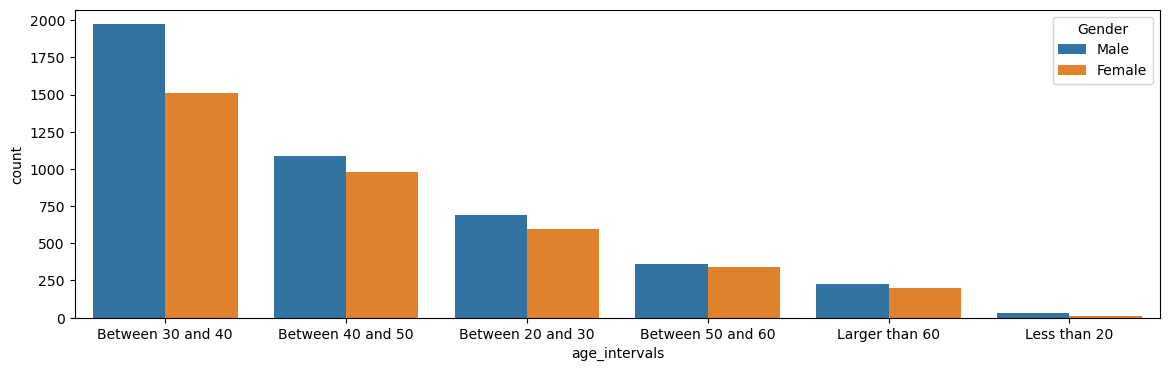

In [23]:
fig=plt.figure(figsize=(14,4))
sns.countplot(data=train_data,x='age_intervals',hue='Gender',order=train_data.age_intervals.value_counts(sort=True,ascending=False).index)

<Axes: xlabel='Gender', ylabel='CreditScore'>

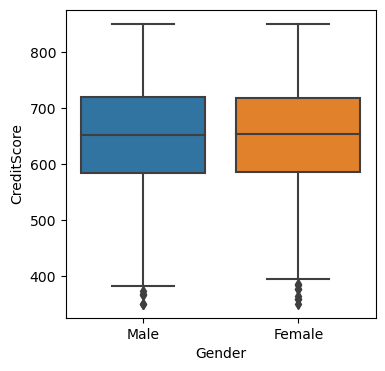

In [24]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Gender',y='CreditScore')

<Axes: xlabel='age_intervals', ylabel='CreditScore'>

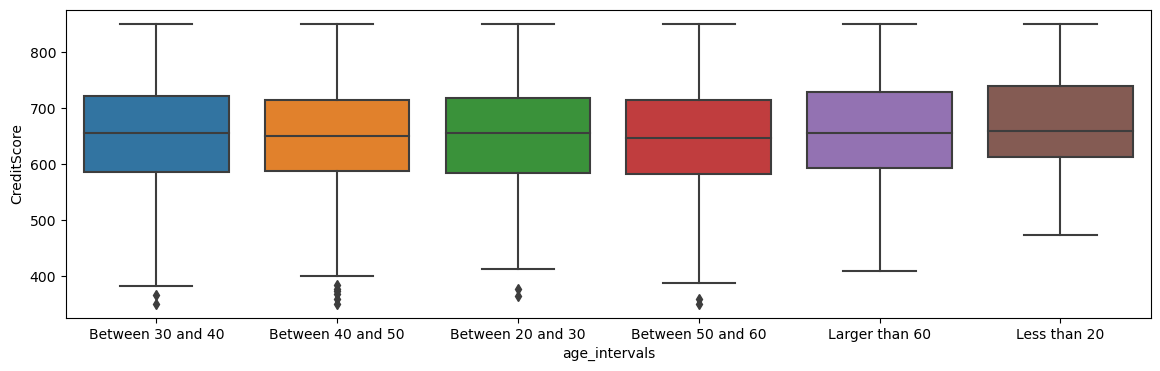

In [25]:
fig=plt.figure(figsize=(14,4))
sns.boxplot(data=train_data,x='age_intervals',y='CreditScore')

<Axes: xlabel='Geography', ylabel='CreditScore'>

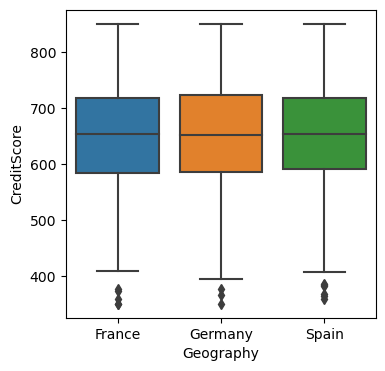

In [26]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Geography',y='CreditScore')

In [27]:
train_data.Tenure.value_counts()

Tenure
2     844
7     832
5     829
1     815
8     805
4     803
3     801
6     777
9     768
10    393
0     333
Name: count, dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

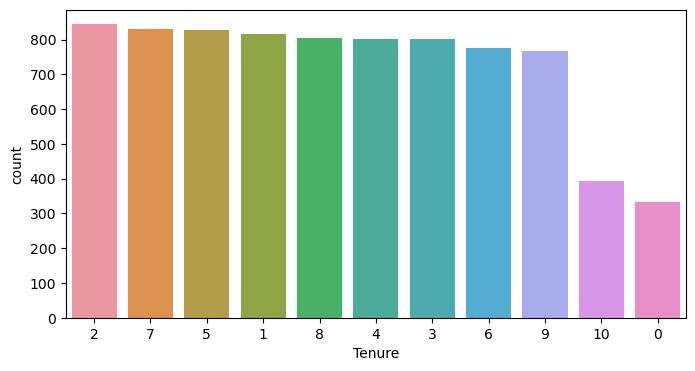

In [28]:
fig=plt.figure(figsize=(8,4))
sns.countplot(data=train_data,x='Tenure',order=train_data.Tenure.value_counts(sort=True,ascending=False).index)

<Axes: xlabel='Tenure', ylabel='count'>

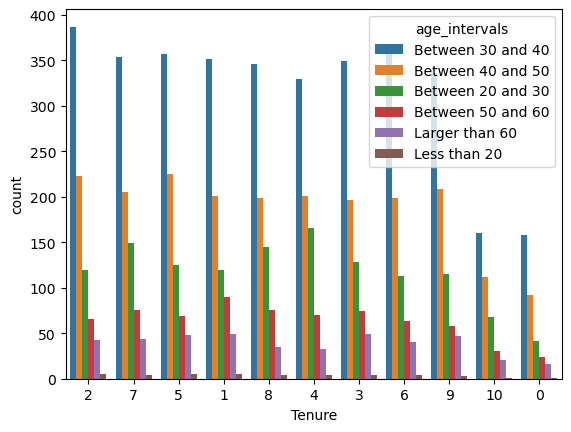

In [29]:
sns.countplot(data=train_data,x='Tenure',hue='age_intervals',order=train_data.Tenure.value_counts(sort=True,ascending=False).index)

In [30]:
train_data.NumOfProducts.value_counts()

NumOfProducts
1    4052
2    3690
3     213
4      45
Name: count, dtype: int64

<Axes: xlabel='NumOfProducts', ylabel='count'>

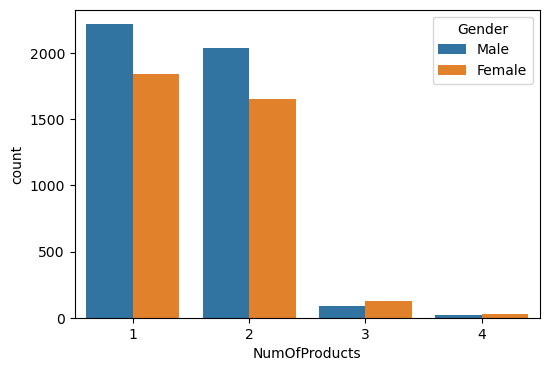

In [31]:
fig=plt.figure(figsize=(6,4))
sns.countplot(data=train_data,x='NumOfProducts',hue='Gender',order=train_data.NumOfProducts.value_counts(sort=True,ascending=False).index)

<Axes: xlabel='age_intervals', ylabel='Balance'>

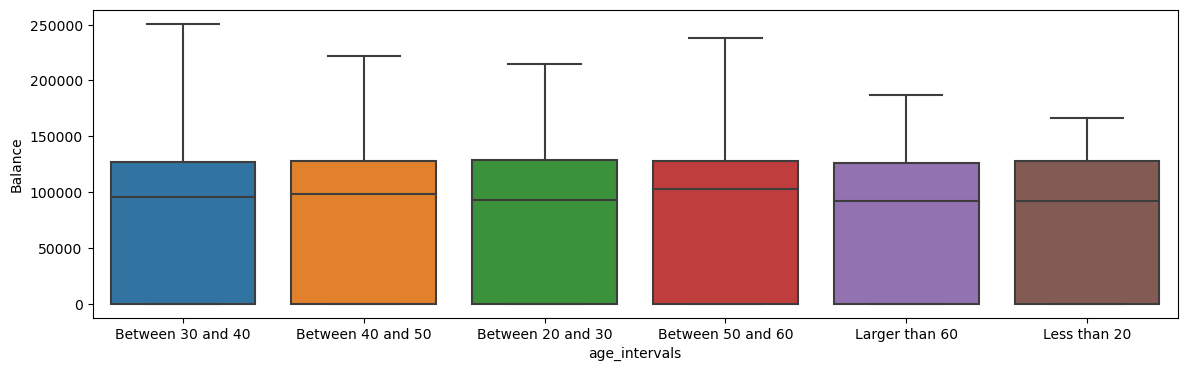

In [32]:
fig=plt.figure(figsize=(14,4))
sns.boxplot(data=train_data,x='age_intervals',y='Balance')

<Axes: xlabel='age_intervals', ylabel='EstimatedSalary'>

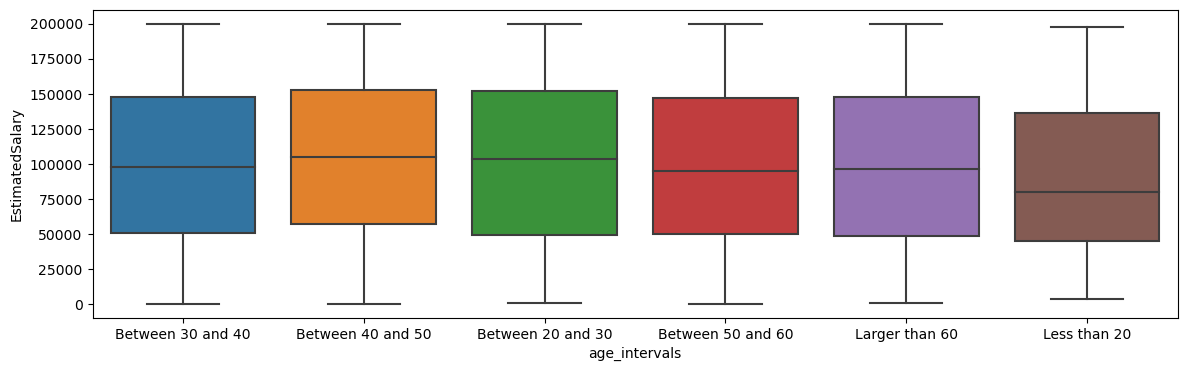

In [33]:
fig=plt.figure(figsize=(14,4))
sns.boxplot(data=train_data,x='age_intervals',y='EstimatedSalary')

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

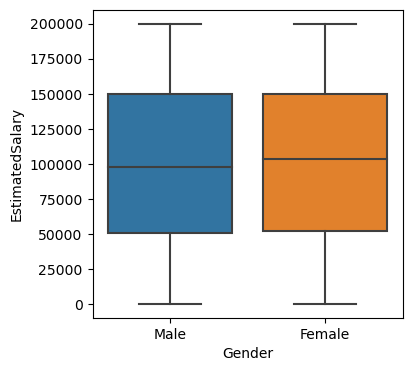

In [34]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Gender',y='EstimatedSalary')

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

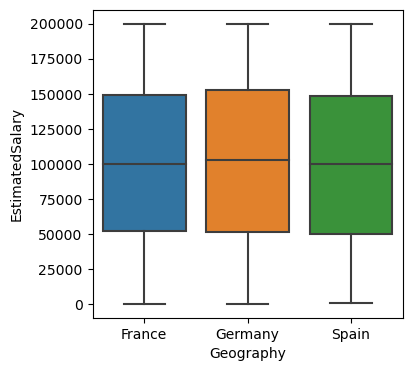

In [35]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Geography',y='EstimatedSalary')

<Axes: xlabel='Geography', ylabel='Balance'>

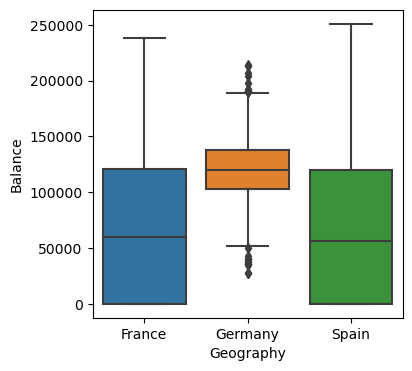

In [36]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data=train_data,x='Geography',y='Balance')

<Axes: xlabel='age_intervals', ylabel='count'>

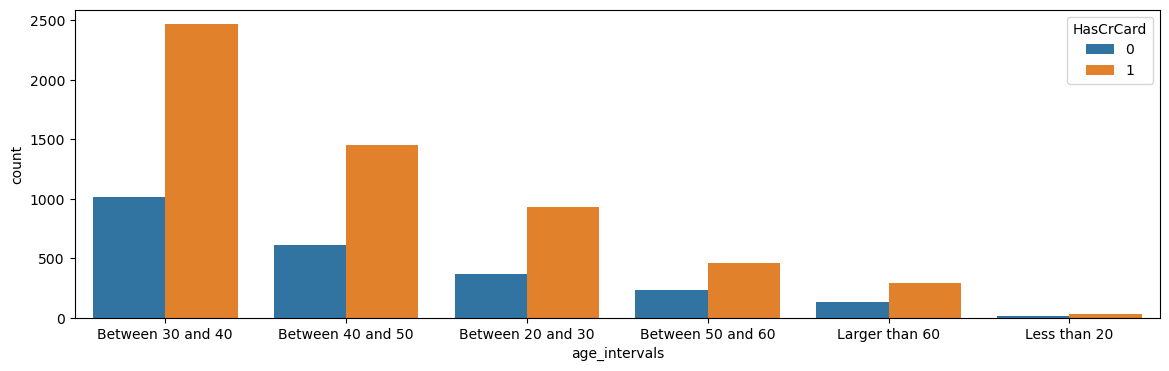

In [37]:
fig=plt.figure(figsize=(14,4))
sns.countplot(data=train_data,x='age_intervals',hue='HasCrCard',order=train_data.age_intervals.value_counts(sort=True,ascending=False).index)

In [126]:
from sklearn.preprocessing import LabelEncoder

In [112]:
columns_to_encode=['Geography', 'Gender']

In [127]:
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

In [ ]:
for column in columns_to_encode:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

In [128]:
train_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,9255,15601116,P'an,686,0,1,32,6,0.00,2,1,1,179093.26,0
1561,1562,15766374,Leak,632,1,1,42,4,119624.60,2,1,1,195978.86,0
1670,1671,15716994,Green,559,2,1,24,3,114739.92,1,1,0,85891.02,1
6087,6088,15730759,Chukwudi,561,0,0,27,9,135637.00,1,1,0,153080.40,1
6669,6670,15797900,Chinomso,517,0,1,56,9,142147.32,1,0,0,39488.04,1


In [41]:
selected_columns = ['CreditScore', 'Geography', 'Gender', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

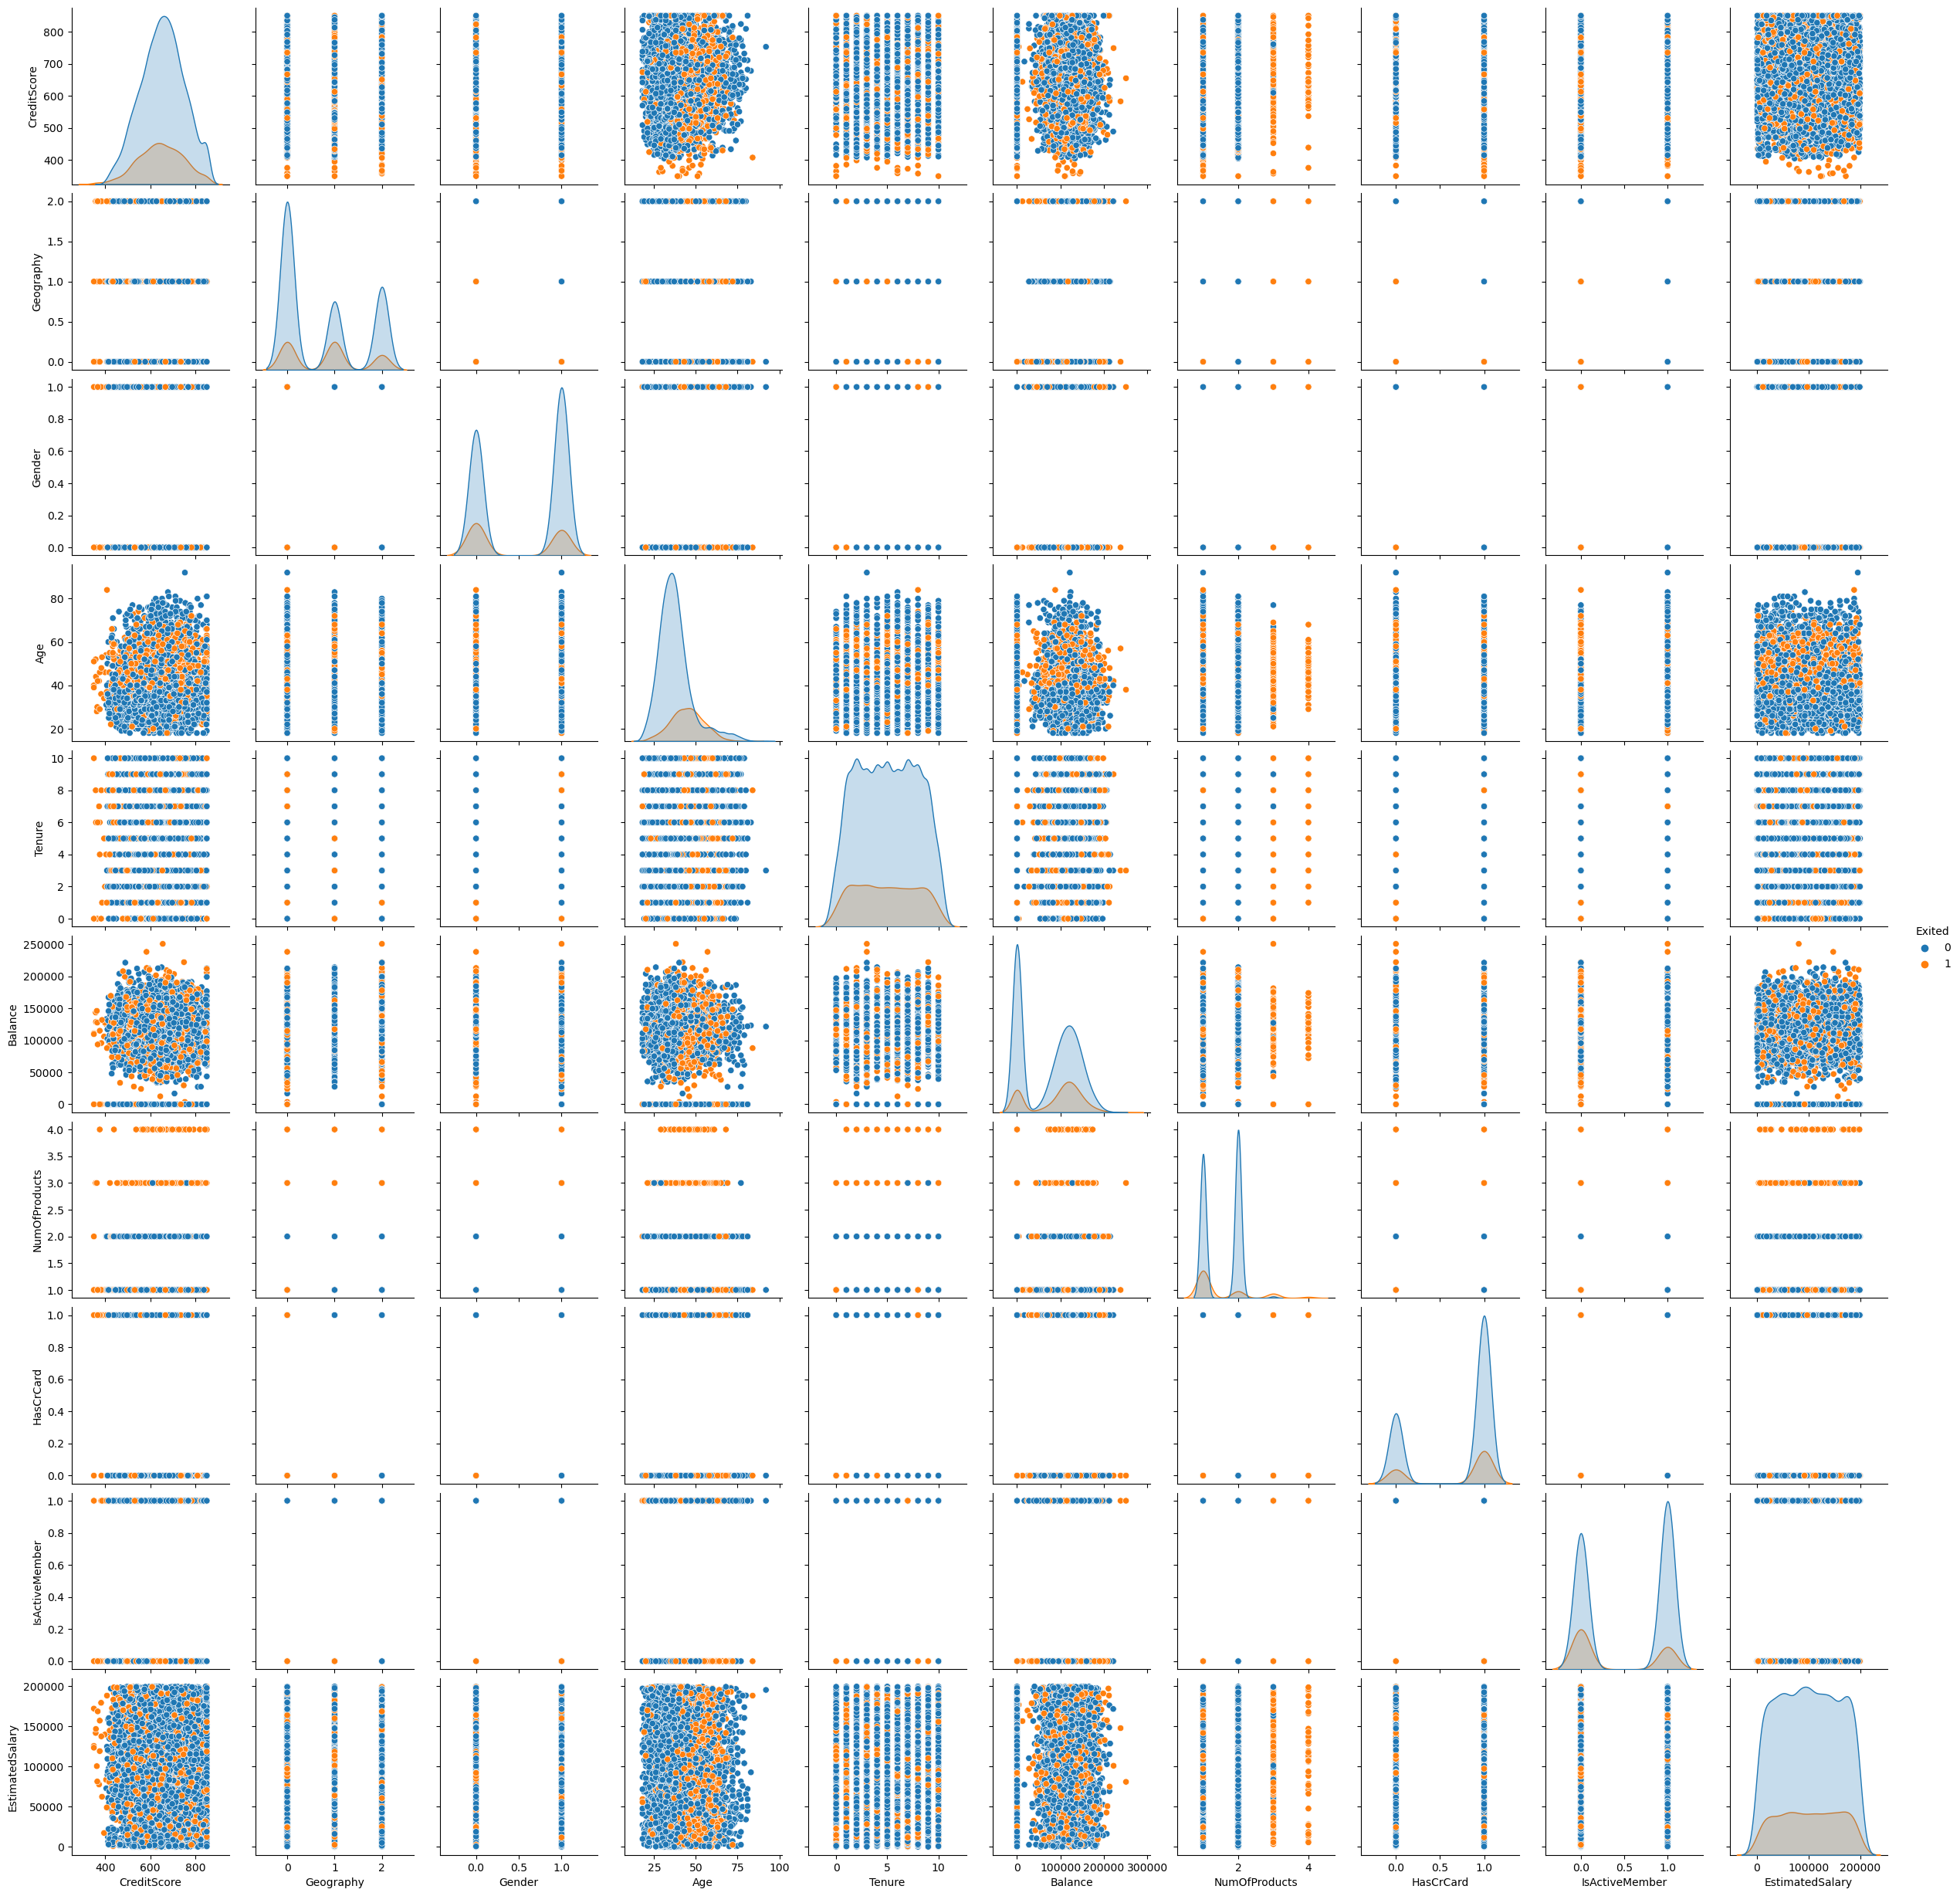

In [42]:
sns.pairplot(train_data[selected_columns],hue='Exited',diag_kind='kde')

In [43]:
train_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_intervals'],
      dtype='object')

In [44]:
numerical_columns=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [45]:
correlation_matrix = train_data[numerical_columns].corr()
print(correlation_matrix)

                 CreditScore       Age    Tenure   Balance  EstimatedSalary
CreditScore         1.000000 -0.007253 -0.007670  0.006758        -0.002628
Age                -0.007253  1.000000 -0.008788  0.027782        -0.000997
Tenure             -0.007670 -0.008788  1.000000 -0.011748         0.022071
Balance             0.006758  0.027782 -0.011748  1.000000         0.011984
EstimatedSalary    -0.002628 -0.000997  0.022071  0.011984         1.000000


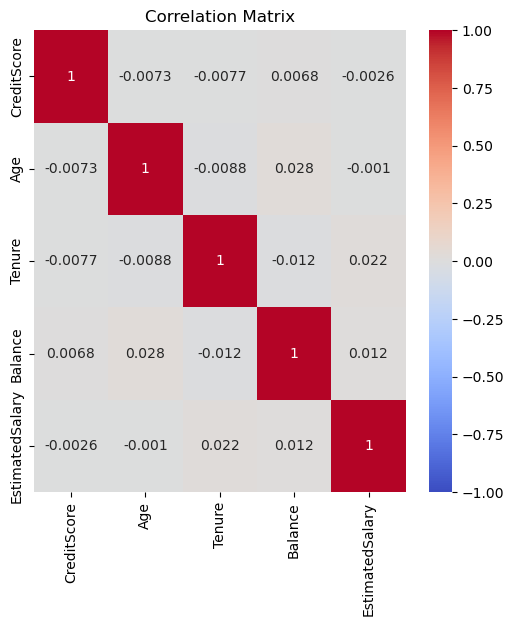

In [46]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [47]:
nominal_fea=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']

In [48]:
from scipy.stats import chi2_contingency

In [49]:
train_data_2=train_data[nominal_fea]

In [50]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [51]:
cramers_v_matrix = np.zeros((7, 7))
for i in range(7):
    for j in range(i+1, 7):  # Avoid redundant calculations (symmetric matrix)
        confusion_matrix = pd.crosstab(train_data_2.iloc[:, i], train_data_2.iloc[:, j])
        cramers_v_matrix[i, j] = cramers_v(confusion_matrix)

In [52]:
print("Cramér's V Matrix:")
print(cramers_v_matrix)

Cramér's V Matrix:
[[0.         0.02368849 0.04000646 0.04863363 0.01144601 0.02728817
  0.1698337 ]
 [0.         0.         0.04812696 0.04689777 0.00375572 0.02003093
  0.10616764]
 [0.         0.         0.         0.05532823 0.03567192 0.0320947
  0.04358448]
 [0.         0.         0.         0.         0.00952129 0.04836658
  0.39268236]
 [0.         0.         0.         0.         0.         0.01163962
  0.00613272]
 [0.         0.         0.         0.         0.         0.
  0.15625096]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [53]:
cramers_v_df = pd.DataFrame(cramers_v_matrix, columns=train_data_2.columns[:10], index=train_data_2.columns[:10])

In [54]:
cramers_v_df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
Geography,0.0,0.023688,0.040006,0.048634,0.011446,0.027288,0.169834
Gender,0.0,0.000000,0.048127,0.046898,0.003756,0.020031,0.106168
Tenure,0.0,0.000000,0.000000,0.055328,0.035672,0.032095,0.043584
NumOfProducts,0.0,0.000000,0.000000,0.000000,0.009521,0.048367,0.392682
HasCrCard,0.0,0.000000,0.000000,0.000000,0.000000,0.011640,0.006133
IsActiveMember,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.156251
Exited,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


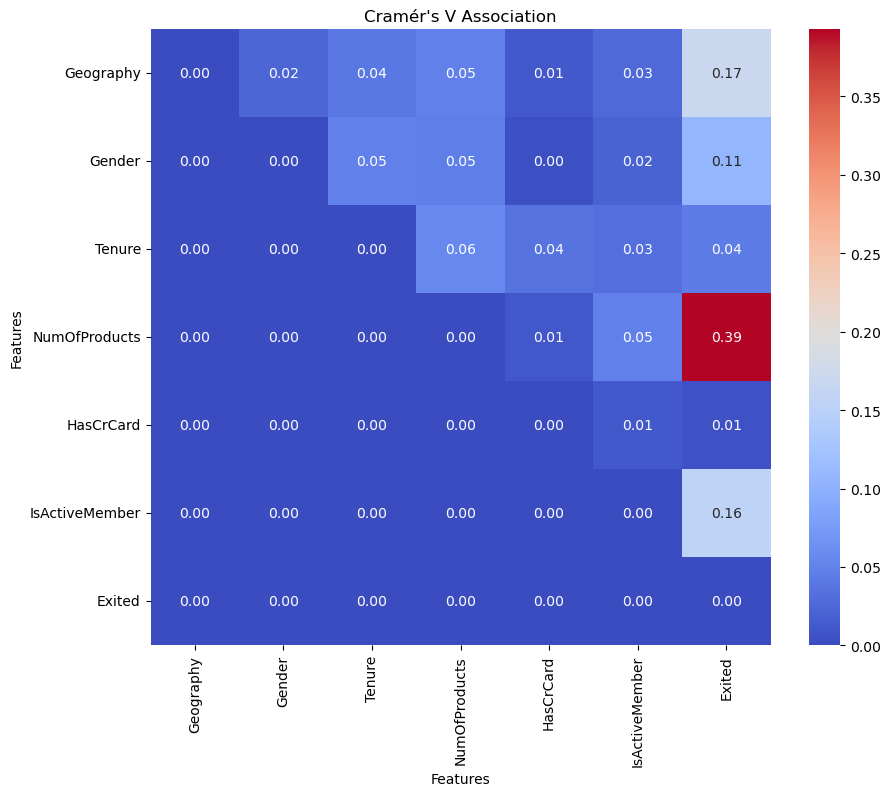

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Association")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [56]:
corr_point=train_data[['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']].corrwith(train_data['Exited'].astype('float'), method=stats.pointbiserialr)

<IPython.core.display.Javascript object>

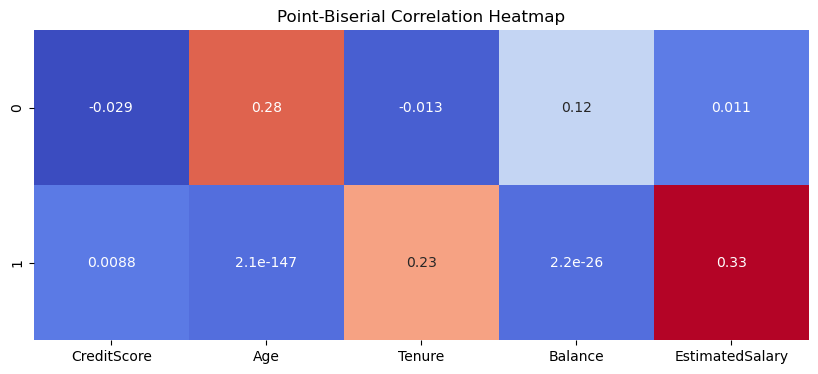

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_point, annot=True, cmap='coolwarm', cbar=False, square=True)
plt.title('Point-Biserial Correlation Heatmap')
plt.show()

In [58]:
train_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_intervals'],
      dtype='object')

In [59]:
X_train=train_data.drop('Exited',axis=1)

In [60]:
X_train=X_train.drop(['RowNumber','CustomerId','Surname','age_intervals'],axis=1)

In [61]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [68]:
test_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
y_train=train_data['Exited']

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipelines_model = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

In [65]:
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1]},
    'Random Forest':{'n_estimators': [100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]},
    'Gradient Boosting':{'n_estimators': [100, 200],'learning_rate': [0.01, 0.1],'max_depth': [3, 4],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2],'subsample': [0.8, 0.9]},
}

In [66]:
for name, pipeline in pipelines_model.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)
    
    

Training Logistic Regression...
Best Parameters: {'clf__C': 1}
Best CV Score: 0.8065000000000001
Training Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.8629999999999999
Training Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.9}
Best CV Score: 0.8628750000000001


In [75]:
def drop(data):
    data.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
    return data

In [135]:
test_data=drop(test_data)

In [136]:
test_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [137]:
x_test_data=test_data.drop('Exited',axis=1)

In [138]:
x_test_data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30


In [124]:
test_data.Geography.value_counts()

Geography
France     1020
Germany     498
Spain       482
Name: count, dtype: int64

In [96]:
y_test_data=test_data['Exited']

In [131]:
for column, le in label_encoders.items():
    if column in test_data:
        test_data[column] = le.transform(test_data[column])

In [132]:
test_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,6253,15687492,Anderson,596,1,1,32,3,96709.07,2,0,0,41788.37,0
4684,4685,15736963,Herring,623,0,1,43,1,0.00,2,1,1,146379.30,0
1731,1732,15721730,Amechi,601,2,0,44,4,0.00,2,1,0,58561.31,0
4742,4743,15762134,Liang,506,1,1,59,8,119152.10,2,1,1,170679.74,0
4521,4522,15648898,Chuang,560,2,0,27,7,124995.98,1,1,1,114669.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,15598982,Klein,602,1,0,53,5,98268.84,1,0,1,45038.29,1
8285,8286,15572631,Ndubuisi,609,0,1,25,10,0.00,1,0,1,109895.16,0
7853,7854,15746674,Miller,730,0,0,47,7,0.00,1,1,0,33373.26,1
1095,1096,15689081,Wu,692,0,1,29,4,0.00,1,1,0,76755.99,1


In [139]:
y_pred = grid_search.predict(x_test_data)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [141]:
cm = confusion_matrix(y_test_data, y_pred)

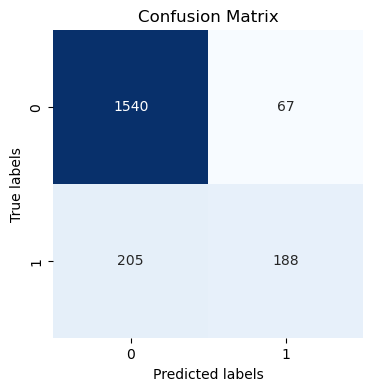

In [142]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [143]:
print("Test Accuracy:", accuracy_score(y_test_data, y_pred))
print("Classification Report:\n", classification_report(y_test_data, y_pred))
print("="*50)

Test Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

